In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
TEST_1 = pd.read_csv('TSCA_1_out.csv')

In [4]:
TEST_2 = pd.read_csv('TSCA_2_out.csv')

In [5]:
TEST_1.set_index('ID', inplace = True)
TEST_2.set_index('ID', inplace = True)

In [6]:
df_test = pd.concat([TEST_1, TEST_2], axis = 0)

In [7]:
df_test.columns

Index(['Index', 'Query', 'SmilesRan', 'Error', 'Exp_Value', 'Pred_Value',
       'Exp_Result', 'Pred_Result'],
      dtype='object')

In [8]:
df_test.Error.unique()

array([nan, 'Multiple molecules', 'FindPaths',
       'Molecule contains unsupported element',
       'Molecule does not contain carbon', 'Only one nonhydrogen atom',
       'FindRings'], dtype=object)

In [9]:
df_test['TEST_prediction'] = df_test.apply(lambda x : 1 if x['Pred_Value'] >=0.5 else (np.nan if x['Error'] in ['Multiple molecules', 'FindPaths',
       'Molecule contains unsupported element',
       'Molecule does not contain carbon', 'Only one nonhydrogen atom',
       'FindRings'] else 0), axis = 1)

In [10]:
df_test.TEST_prediction.value_counts(dropna = False)

 0.0    10526
NaN      6941
 1.0     2156
Name: TEST_prediction, dtype: int64

In [11]:
df_test[~df_test['Error'].isnull()].to_csv('TEST_errors.csv')

In [12]:
test_missing_1 = pd.read_excel('TEST_missing_1.xlsx')

In [13]:
test_missing_2 = pd.read_excel('TEST_missing_2.xlsx')

In [14]:
test_missing_1.shape

(4998, 7)

In [15]:
test_missing_2.shape

(1943, 6)

In [16]:
test_missing_1.set_index('INPUT', inplace = True)
test_missing_2.set_index('INPUT', inplace = True)

test_missing = pd.concat([test_missing_1, test_missing_2], axis = 0)

/home/gpatlewi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [17]:
test_missing.shape

(6941, 6)

In [30]:
test_missing.to_csv('TEST_errors_smi.csv')

In [18]:
test_missing.shape

(6941, 6)

In [19]:
test_missing_smi = pd.read_csv('TEST_missing_new.csv')

In [20]:
test_missing_smi.head()

,INPUT,QSAR_READY_SMILES
0,DTXSID5020075,NC1=CC=C(C=C1)N(CCO)CCO
1,DTXSID5020079,OC(=O)CC(O)(CC(O)=O)C(O)=O
2,DTXSID3020091,NC1=CC=CC=C1
3,DTXSID3020093,COC1=CC=C(N)C=C1
4,DTXSID3020095,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2


In [21]:
df_test.head()

,Index,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result,TEST_prediction
ID,,,,,,,,,
DTXSID2020004,1,DTXSID2020004,ON=CC,NaN,1.0,0.70,Mutagenicity Positive,Mutagenicity Positive,1.0
DTXSID7020005,2,DTXSID7020005,O=C(N)C,NaN,0.0,-0.04,Mutagenicity Negative,Mutagenicity Negative,0.0
DTXSID2020006,3,DTXSID2020006,O=C(NC1=CC=C(O)C=C1)C,NaN,0.0,0.28,Mutagenicity Negative,Mutagenicity Negative,0.0
DTXSID7020009,4,DTXSID7020009,N#CC,NaN,0.0,0.04,Mutagenicity Negative,Mutagenicity Negative,0.0
DTXSID6020010,5,DTXSID6020010,ON=C(C)C,NaN,NaN,0.44,NaN,Mutagenicity Negative,0.0


In [22]:
import glob

In [23]:
test_redone = glob.glob('TEST_errors_out*.csv')

In [25]:
test_redone.sort()

In [26]:
test_redone

['TEST_errors_out1.csv',
 'TEST_errors_out2.csv',
 'TEST_errors_out3.csv',
 'TEST_errors_out4.csv',
 'TEST_errors_out5.csv',
 'TEST_errors_out6.csv',
 'TEST_errors_out7.csv',
 'TEST_errors_out8.csv',
 'TEST_errors_out9.csv']

In [27]:
all_data = pd.DataFrame()
for f in test_redone:
    df = pd.read_csv(f)
    all_data = all_data.append(df, ignore_index = True)

In [28]:
all_data.head()

,Index,ID,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result
0,1,7575-35-1,7575-35-1,OCCN(C1=CC=C(N)C=C1)CCO,NaN,NaN,0.24,NaN,Mutagenicity Negative
1,2,77-92-9,77-92-9,O=C(O)CC(O)(C(=O)O)CC(=O)O,NaN,0.0,0.21,Mutagenicity Negative,Mutagenicity Negative
2,3,62-53-3,62-53-3,NC=1C=CC=CC1,NaN,NaN,0.36,NaN,Mutagenicity Negative
3,4,104-94-9,104-94-9,O(C1=CC=C(N)C=C1)C,NaN,1.0,0.62,Mutagenicity Positive,Mutagenicity Positive
4,5,84-65-1,84-65-1,O=C1C=2C=CC=CC2C(=O)C=3C=CC=CC13,NaN,1.0,0.71,Mutagenicity Positive,Mutagenicity Positive


In [102]:
#pd.read_csv('TEST_errors_out1.csv').head()

In [29]:
test_redone_df = pd.concat([test_missing_smi, all_data], axis = 1)

In [30]:
test_redone_df.head()

,INPUT,QSAR_READY_SMILES,Index,ID,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result
0,DTXSID5020075,NC1=CC=C(C=C1)N(CCO)CCO,1,7575-35-1,7575-35-1,OCCN(C1=CC=C(N)C=C1)CCO,NaN,NaN,0.24,NaN,Mutagenicity Negative
1,DTXSID5020079,OC(=O)CC(O)(CC(O)=O)C(O)=O,2,77-92-9,77-92-9,O=C(O)CC(O)(C(=O)O)CC(=O)O,NaN,0.0,0.21,Mutagenicity Negative,Mutagenicity Negative
2,DTXSID3020091,NC1=CC=CC=C1,3,62-53-3,62-53-3,NC=1C=CC=CC1,NaN,NaN,0.36,NaN,Mutagenicity Negative
3,DTXSID3020093,COC1=CC=C(N)C=C1,4,104-94-9,104-94-9,O(C1=CC=C(N)C=C1)C,NaN,1.0,0.62,Mutagenicity Positive,Mutagenicity Positive
4,DTXSID3020095,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2,5,84-65-1,84-65-1,O=C1C=2C=CC=CC2C(=O)C=3C=CC=CC13,NaN,1.0,0.71,Mutagenicity Positive,Mutagenicity Positive


In [31]:
test_redone_df['Error'].unique()

array([nan, 'FindPaths', 'Molecule contains unsupported element',
       'Only one nonhydrogen atom', 'FindRings'], dtype=object)

In [32]:
test_redone_df['TEST_prediction'] = test_redone_df.apply(lambda x : 1 if x['Pred_Value'] >=0.5 else (np.nan if x['Error'] in ['Multiple molecules', 'FindPaths',
       'Molecule contains unsupported element',
       'Molecule does not contain carbon', 'Only one nonhydrogen atom',
       'FindRings'] else 0), axis = 1)

In [33]:
test_redone_df.head()

,INPUT,QSAR_READY_SMILES,Index,ID,Query,SmilesRan,Error,Exp_Value,Pred_Value,Exp_Result,Pred_Result,TEST_prediction
0,DTXSID5020075,NC1=CC=C(C=C1)N(CCO)CCO,1,7575-35-1,7575-35-1,OCCN(C1=CC=C(N)C=C1)CCO,NaN,NaN,0.24,NaN,Mutagenicity Negative,0.0
1,DTXSID5020079,OC(=O)CC(O)(CC(O)=O)C(O)=O,2,77-92-9,77-92-9,O=C(O)CC(O)(C(=O)O)CC(=O)O,NaN,0.0,0.21,Mutagenicity Negative,Mutagenicity Negative,0.0
2,DTXSID3020091,NC1=CC=CC=C1,3,62-53-3,62-53-3,NC=1C=CC=CC1,NaN,NaN,0.36,NaN,Mutagenicity Negative,0.0
3,DTXSID3020093,COC1=CC=C(N)C=C1,4,104-94-9,104-94-9,O(C1=CC=C(N)C=C1)C,NaN,1.0,0.62,Mutagenicity Positive,Mutagenicity Positive,1.0
4,DTXSID3020095,O=C1C2=C(C=CC=C2)C(=O)C2=C1C=CC=C2,5,84-65-1,84-65-1,O=C1C=2C=CC=CC2C(=O)C=3C=CC=CC13,NaN,1.0,0.71,Mutagenicity Positive,Mutagenicity Positive,1.0


In [34]:
test_redone_df.columns

Index(['INPUT', 'QSAR_READY_SMILES', 'Index', 'ID', 'Query', 'SmilesRan',
       'Error', 'Exp_Value', 'Pred_Value', 'Exp_Result', 'Pred_Result',
       'TEST_prediction'],
      dtype='object')

In [35]:
test_redone_df.set_index('INPUT', inplace = True)

In [36]:
test_redone_df2 = test_redone_df[['TEST_prediction']]

In [37]:
test_redone_df2.head()

,TEST_prediction
INPUT,
DTXSID5020075,0.0
DTXSID5020079,0.0
DTXSID3020091,0.0
DTXSID3020093,1.0
DTXSID3020095,1.0


In [38]:
df_test2 = df_test[['TEST_prediction']]

In [39]:
df_test2.head()
df_test2[df_test2.index == 'DTXSID5020075']

,TEST_prediction
ID,
DTXSID5020075,NaN


In [40]:
all_test = pd.concat([df_test2, test_redone_df2], axis = 0)

In [41]:
all_test_df = all_test.reset_index().drop_duplicates(subset = 'index', keep = 'last')

In [42]:
all_test_df[all_test_df['index'] == 'DTXSID5020075']

,index,TEST_prediction
19623,DTXSID5020075,0.0


In [43]:
all_test_df.set_index('index', inplace = True)

In [137]:


# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('TEST_genetox_150221.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
all_test_df.to_excel(writer, sheet_name='TEST_TSCA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [44]:
all_test_df.TEST_prediction.value_counts(dropna = False)

 0.0    14088
 1.0     2802
NaN      2733
Name: TEST_prediction, dtype: int64

In [45]:
all_test_df['aggregate_study_type'] = 'TEST_Mutagenicity'

In [46]:
all_test_df = all_test_df.reset_index()

In [47]:
all_test_df.columns = ['DTXSID','assay_outcome', 'aggregate_study_type']

In [48]:
all_test_df.head()

,DTXSID,assay_outcome,aggregate_study_type
0,DTXSID2020004,1.0,TEST_Mutagenicity
1,DTXSID7020005,0.0,TEST_Mutagenicity
2,DTXSID2020006,0.0,TEST_Mutagenicity
3,DTXSID7020009,0.0,TEST_Mutagenicity
4,DTXSID6020010,0.0,TEST_Mutagenicity


In [49]:
df_oecd = pd.read_excel('TSCA_genetox_TB_out.xlsx')

In [50]:
df_oecd.shape

(19251, 11)

In [51]:
import re
p = re.compile(r'DTXSID\d{1,}')

In [52]:
dtxsid = [m.group(0) for l in df_oecd['Chemical name(s)'] for m in [p.search(l)] if m]

In [53]:
len(dtxsid)

19251

In [54]:
df_oecd['dtxsid'] = dtxsid

In [55]:
df_oecd.columns

Index(['Chemical name(s)',
       'Carcinogenicity (genotox and nongenotox) alerts by ISS',
       'DNA alerts for AMES, CA and MNT by OASIS', 'DNA binding by OASIS',
       'DNA binding by OECD', 'Oncologic Primary Classification',
       'Protein binding alerts for Chromosomal aberration by OASIS',
       'Protein binding by OASIS', 'Protein binding by OECD',
       'in vitro mutagenicity (Ames test) alerts by ISS',
       'in vivo mutagenicity (Micronucleus) alerts by ISS', 'dtxsid'],
      dtype='object')

In [56]:
df_oecd = df_oecd[['dtxsid','Carcinogenicity (genotox and nongenotox) alerts by ISS',
       'DNA alerts for AMES, CA and MNT by OASIS', 'DNA binding by OASIS',
       'DNA binding by OECD', 'Oncologic Primary Classification',
       'Protein binding alerts for Chromosomal aberration by OASIS',
       'Protein binding by OASIS', 'Protein binding by OECD',
       'in vitro mutagenicity (Ames test) alerts by ISS',
       'in vivo mutagenicity (Micronucleus) alerts by ISS']]

In [57]:
df_oecd.rename(columns = {'Carcinogenicity (genotox and nongenotox) alerts by ISS': 'Carc_ISS',
       'DNA alerts for AMES, CA and MNT by OASIS': 'DNA_Ames_CA_MNT_OASIS', 'DNA binding by OASIS': 'DNA_binding_OASIS',
       'DNA binding by OECD': 'DNA_binding_OECD', 'Oncologic Primary Classification': 'Oncologic',
       'Protein binding alerts for Chromosomal aberration by OASIS': 'Protein_binding_CA_OASIS',
       'Protein binding by OASIS': 'Protein_binding_OASIS', 'Protein binding by OECD': 'Protein_binding_OECD',
       'in vitro mutagenicity (Ames test) alerts by ISS': 'Ames_ISS',
       'in vivo mutagenicity (Micronucleus) alerts by ISS': 'MNT_ISS'}, inplace = True)

In [58]:
df_oecd_numeric = df_oecd.copy()

In [59]:
df_oecd_numeric.replace({'No alert found' :0, 'N/A': np.nan, 'Not classified' : 0}, inplace = True)

In [60]:
df_oecd_numeric.set_index('dtxsid', inplace = True)

In [61]:
df_oecd_numeric.replace({'\w+':1}, regex = True, inplace = True)

In [61]:



# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('OECD_Toolbox_genetox_150221.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_oecd_numeric.to_excel(writer, sheet_name='OECD_numeric_TSCA')
df_oecd.to_excel(writer, sheet_name='OECD_TSCA')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [62]:
oecd = df_oecd_numeric.reset_index()

In [63]:
oecd  = oecd[['dtxsid', 'DNA_Ames_CA_MNT_OASIS', 'DNA_binding_OASIS',
       'DNA_binding_OECD',  'Protein_binding_CA_OASIS',
        'Ames_ISS', 'MNT_ISS']]

In [64]:
oecd.head()

,dtxsid,DNA_Ames_CA_MNT_OASIS,DNA_binding_OASIS,DNA_binding_OECD,Protein_binding_CA_OASIS,Ames_ISS,MNT_ISS
0,DTXSID2020004,0,0,0,0,0,0
1,DTXSID7020005,0,0,0,0,0,0
2,DTXSID2020006,0,0,0,1,1,1
3,DTXSID7020009,0,0,0,0,0,0
4,DTXSID6020010,0,0,0,0,0,0


In [65]:
toolbox_new_df = pd.melt(oecd, id_vars = ['dtxsid'], value_vars = [
 'DNA_Ames_CA_MNT_OASIS', 'DNA_binding_OASIS',
       'DNA_binding_OECD',  'Protein_binding_CA_OASIS',
        'Ames_ISS', 'MNT_ISS'])

In [66]:
toolbox_new_df.rename(columns = {'variable': 'aggregate_study_type', 'value': 'assay_outcome'}, inplace = True)

In [67]:
toolbox_new_df.set_index('dtxsid', inplace = True)

In [68]:
all_test_df.set_index('DTXSID', inplace = True)

In [69]:
insilico = pd.concat([toolbox_new_df, all_test_df ])

/home/gpatlewi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [70]:
insilico.aggregate_study_type.unique()

array(['DNA_Ames_CA_MNT_OASIS', 'DNA_binding_OASIS', 'DNA_binding_OECD',
       'Protein_binding_CA_OASIS', 'Ames_ISS', 'MNT_ISS',
       'TEST_Mutagenicity'], dtype=object)

In [71]:
tag_sar = {'DNA_Ames_CA_MNT_OASIS': 'pAmes', 'DNA_binding_OASIS': 'pAmes',
       'DNA_binding_OECD': 'pAmes',  'Protein_binding_CA_OASIS': 'pclastogen',
        'Ames_ISS': 'pAmes', 'MNT_ISS': 'pclastogen', 'TEST_Mutagenicity': 'pAmes'}

In [72]:
insilico['simple_aggregate'] = insilico['aggregate_study_type']

In [73]:
insilico['simple_aggregate'].replace(tag_sar , inplace = True)

In [74]:
insilico.head()

,aggregate_study_type,assay_outcome,simple_aggregate
DTXSID2020004,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
DTXSID7020005,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
DTXSID2020006,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
DTXSID7020009,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
DTXSID6020010,DNA_Ames_CA_MNT_OASIS,0.0,pAmes


In [159]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('insilico_genetox_predictions_all_TSCA_150221.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
insilico.to_excel(writer, sheet_name='TSCA_insilico_all_numeric')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [161]:
#insilico.index

In [75]:
genetox_df = pd.read_excel('genetox_merged_110221_final.xlsx')

In [76]:
genetox_df.columns

Index(['source', 'name', 'casrn', 'assay_category', 'assay_type',
       'assay_result', 'species', 'strain', 'metabolic_activation',
       'cytotoxicity', 'data_quality', 'reference', 'year', 'document_source',
       'duration', 'assay_potency', 'comment', 'document_number', 'title',
       'genetox_results', 'reference_url', 'genetox_note', 'protocol_era',
       'assay_code', 'sex', 'dose_response', 'panel_report', 'glp',
       'guideline', 'dtxsid', 'standard_assay_type', 'assay_result_std',
       'assay_outcome', 'aggregate_study_type', 'simple_aggregate'],
      dtype='object')

In [77]:
genetox_df.set_index('dtxsid', inplace = True)

In [78]:
genetox_df.simple_aggregate.value_counts(dropna = False, normalize = True)

Ames             0.458188
clastogen        0.262677
other            0.182958
gene_mutation    0.096177
Name: simple_aggregate, dtype: float64

In [79]:
g = genetox_df.groupby(genetox_df.index).agg({'assay_outcome': 'count'})

In [80]:
g = g.reset_index()

In [81]:
import seaborn as sns

In [82]:
g['logcount'] = np.log10(g['assay_outcome']) + 1

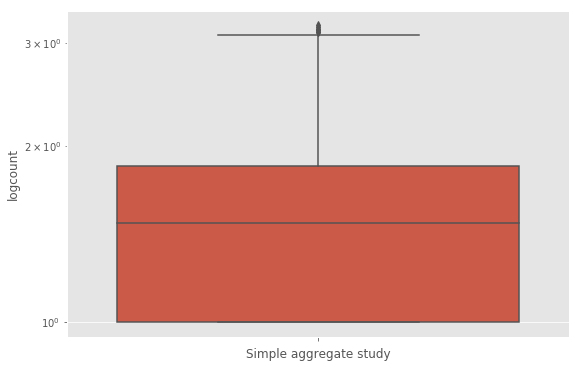

In [83]:
plt.style.use('ggplot')
plt.figure(figsize = (9,6))
sns.boxplot(y = 'logcount', data = g)
plt.xlabel('Simple aggregate study')
plt.yscale('log')
#plt.savefig('boxplot_alldata.png')

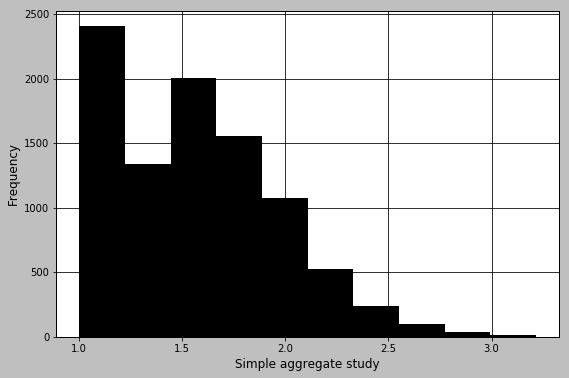

In [91]:
plt.style.use('grayscale')
plt.figure(figsize = (9,6))
plt.xlabel('Simple aggregate study')
plt.ylabel('Frequency')


plt.hist(g.logcount)
plt.savefig('Figure 2a.png', dpi = 300);

In [266]:
gg = genetox_df.groupby([genetox_df.index, 'simple_aggregate']).agg({'assay_outcome': 'count'})

In [269]:
gg = gg.reset_index()

In [271]:
gg['logcount'] = np.log10(gg['assay_outcome']) +1

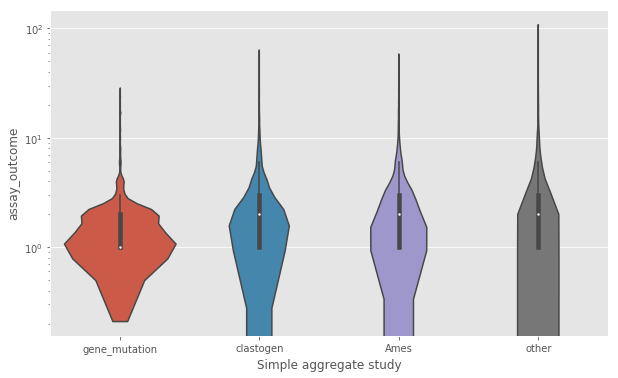

In [273]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'simple_aggregate', y = 'assay_outcome', data = gg)
plt.xlabel('Simple aggregate study')
plt.yscale('log')
plt.savefig('vionplot_alldata.png', dpi = 300)

In [92]:
g[g['assay_outcome'] > 150]

,dtxsid,assay_outcome,logcount
1916,DTXSID2020216,156,3.193125
1953,DTXSID2020715,164,3.214844


In [93]:
max_studies = genetox_df[genetox_df.index == 'DTXSID2020715']

In [94]:
max_studies['simple_aggregate'].value_counts()

other            100
clastogen         34
Ames              27
gene_mutation      3
Name: simple_aggregate, dtype: int64

In [95]:
genetox_final = pd.concat([genetox_df, insilico])

/home/gpatlewi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [96]:
genetox_final.assay_outcome.unique()

array([ 0.,  1.,  2., nan])

In [97]:
genetox_final = genetox_final.reset_index()
genetox_final.rename(columns = {'index': 'dtxsid'}, inplace = True)

In [98]:
genetox_final.dtxsid.nunique()

23345

In [99]:
calls = {}
for i, group in genetox_final.groupby('dtxsid'):
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        calls[i]='gentox'
    elif ('clastogen', 1) in tuples:
        calls[i]='clastogen'  
    elif ('Ames', 2) in tuples:
        calls[i]='inconclusive'    
    elif ('clastogen', 2) in tuples:
        calls[i]='inconclusive' 
    elif ('Ames', 0) in tuples:
        calls[i]='non gentox'
    elif ('clastogen', 0) in tuples:
        calls[i]='not clastogen'    
    elif ('pAmes', 1) in tuples:
        calls[i]='pred gentox'
    elif ('pclastogen', 1) in tuples:
        calls[i]='pred clastogen'
    elif ('pAmes', 0) in tuples:
        calls[i]='pred non gentox'
    elif ('pclastogen', 0) in tuples:
        calls[i]='pred non clastogen'
    else:
        None

In [100]:
calls_df = pd.DataFrame(list(calls.items()), columns = ['dtxsid', 'Overall_genetox_call'])

In [101]:
calls_df.head()

,dtxsid,Overall_genetox_call
0,DTXSID001000726,pred clastogen
1,DTXSID001003875,pred gentox
2,DTXSID00100498,not clastogen
3,DTXSID001006300,pred gentox
4,DTXSID00100670,non gentox


In [102]:
calls_df['overall_genetox_score'] = calls_df['Overall_genetox_call']

In [103]:
tag_judson = {'pred gentox': 3, np.nan: 0, 'non gentox': 1, 'gentox': 4, 'inconclusive': 2, 'clastogen': 4, 'pred clastogen' :3, 'not clastogen': 1, 'pred non clastogen': 1,'pred non gentox': 1}

In [104]:
calls_df['overall_genetox_score'].replace(tag_judson , inplace = True)

In [105]:
calls_df.shape

(22516, 3)

In [193]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('calls_150221.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
calls_df.to_excel(writer, sheet_name='DeMarini_predictions')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [196]:
pwd

'/share/home3/gpatlewi/python/genetox_tsca/QCdatasets/new_tsca'

In [106]:
xls215 = pd.ExcelFile('/share/home3/gpatlewi/python/genetox_tsca/TSCA_binning_picklist_18Sept2018.xlsx')

In [107]:
xls215.sheet_names

['Key', 'pick_215', 'pick_209', 'pick_297', 'binning_master']

In [108]:
tscaact_poc = xls215.parse('pick_215')

In [109]:
tscaact_poc.head()

,dsstox_substance_id,casrn,name,bin_med_seem2,bin_u95_seem2,bin_med_seem3,bin_u95_seem3,UVCB,RBP,SIDS,...,genotoxicity,HTTK.invitro,HTTK.Css95.invitro,HTTK.insilico,HTTK.Css95.insilico,genotoxicity.pick,aop.pick,eco.gen.pick,scil.gras.pick,Has_BER
0,DTXSID0020232,58-08-2,Caffeine,1,1,1,1,NaN,NaN,1.0,...,0,1.0,0.303733,1.0,0.000000,0,0,1,NaN,1.0
1,DTXSID0020234,62-54-4,Calcium acetate,0,0,0,0,NaN,1.0,NaN,...,0,NaN,NaN,NaN,NaN,0,0,0,1.0,NaN
2,DTXSID0020280,88-73-3,1-Chloro-2-nitrobenzene,1,1,1,1,NaN,NaN,1.0,...,0,0.0,0.000000,1.0,0.468392,1,0,0,NaN,NaN
3,DTXSID0020446,330-54-1,Diuron,4,4,4,4,NaN,NaN,NaN,...,0,1.0,0.297922,1.0,0.000000,0,1,0,NaN,1.0
4,DTXSID0020448,78-87-5,"1,2-Dichloropropane",5,4,4,4,NaN,NaN,1.0,...,0,0.0,0.000000,1.0,2.517750,0,0,0,NaN,NaN


In [110]:
tsca215list = tscaact_poc.iloc[:,0].tolist()

In [111]:
len(tsca215list)

215

In [112]:
calls_df.head()

,dtxsid,Overall_genetox_call,overall_genetox_score
0,DTXSID001000726,pred clastogen,3
1,DTXSID001003875,pred gentox,3
2,DTXSID00100498,not clastogen,1
3,DTXSID001006300,pred gentox,3
4,DTXSID00100670,non gentox,1


In [113]:
calls215 = calls_df[calls_df['dtxsid'].isin(tsca215list)]

In [114]:
calls215.dtxsid.nunique()

202

In [115]:
xls238 = pd.ExcelFile('/share/home3/gpatlewi/python/genetox_tsca/QCdatasets/POC238_280419.xlsx')

In [116]:
xls238.sheet_names

['Sheet1']

In [117]:
poc238 = xls238.parse('Sheet1')

In [118]:
poc238.dsstox_substance_id.nunique()

238

In [119]:
poc238_lst = poc238[poc238['TSCA_POC']==1]['dsstox_substance_id'].tolist()

In [120]:
calls_poc = calls_df[calls_df['dtxsid'].isin(poc238_lst)]

In [121]:
calls_poc['Overall_genetox_call'].value_counts(dropna = False, normalize = False)

gentox             81
non gentox         77
clastogen          33
pred non gentox    10
pred gentox         8
inconclusive        6
pred clastogen      6
not clastogen       4
Name: Overall_genetox_call, dtype: int64

In [122]:
calls_poc.columns

Index(['dtxsid', 'Overall_genetox_call', 'overall_genetox_score'], dtype='object')

In [123]:
calls_poc['overall_genetox_score'].value_counts(dropna = False, normalize = True)

4    0.506667
1    0.404444
3    0.062222
2    0.026667
Name: overall_genetox_score, dtype: float64

In [124]:
calls_poc.shape


(225, 3)

In [125]:
calls_poc['summary_outcome'] = calls_poc['Overall_genetox_call']

/home/gpatlewi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
tag_poc = {'gentox': 'genotoxic',\
           'non gentox': 'non-genotoxic',\
           'clastogen': 'genotoxic',\
           'pred non gentox': 'pred non-genotoxic',\
           'pred gentox': 'pred genotoxic', \
          'pred clastogen' : 'pred genotoxic',\
          'not clastogen': 'non-genotoxic'}

In [127]:
calls_poc['summary_outcome'].replace(tag_poc, inplace = True)

/home/gpatlewi/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [128]:
calls_poc.summary_outcome.value_counts(dropna = False, normalize = True)

genotoxic             0.506667
non-genotoxic         0.360000
pred genotoxic        0.062222
pred non-genotoxic    0.044444
inconclusive          0.026667
Name: summary_outcome, dtype: float64

In [129]:
calls_poc[calls_poc['dtxsid'] == 'DTXSID0020280']

,dtxsid,Overall_genetox_call,overall_genetox_score,summary_outcome
145,DTXSID0020280,gentox,4,genotoxic


In [130]:
dtx_spec = genetox_final[genetox_final['dtxsid'] == 'DTXSID0020280']

In [131]:
dtx_spec[dtx_spec['simple_aggregate']== 'pclastogen']['assay_outcome'].value_counts()

1.0    1
0.0    1
Name: assay_outcome, dtype: int64

In [132]:
tsca_all = pd.read_excel('TSCA_all.xlsx')

In [133]:
tsca_all.shape

(33364, 14)

In [134]:
calls_df.shape

(22516, 3)

In [135]:
tsca_lst = tsca_all.DTXSID.tolist()

In [136]:
calls_tsca = calls_df[calls_df['dtxsid'].isin(tsca_lst)]

In [137]:
calls_tsca.Overall_genetox_call.value_counts()

pred gentox        7016
pred non gentox    5125
non gentox         4190
pred clastogen     1933
gentox             1294
clastogen           518
not clastogen       192
inconclusive        103
Name: Overall_genetox_call, dtype: int64

In [138]:
calls_tsca.overall_genetox_score.value_counts(dropna = False)

1    9507
3    8949
4    1812
2     103
Name: overall_genetox_score, dtype: int64

In [139]:
calls_tsca.overall_genetox_score.value_counts(dropna = False, normalize = True)

1    0.466693
3    0.439301
4    0.088950
2    0.005056
Name: overall_genetox_score, dtype: float64

In [140]:
calls_tsca.shape

(20371, 3)

In [141]:
calls_tsca.Overall_genetox_call.unique()

array(['pred clastogen', 'pred gentox', 'not clastogen', 'non gentox',
       'gentox', 'clastogen', 'pred non gentox', 'inconclusive'],
      dtype=object)

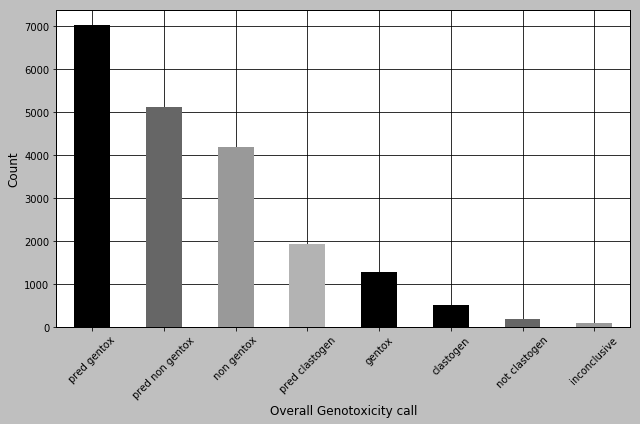

In [142]:
plt.style.use('grayscale')
plt.figure(figsize = (9,6))
calls_tsca.Overall_genetox_call.value_counts().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('TSCA_calls.png', dpi = 300)

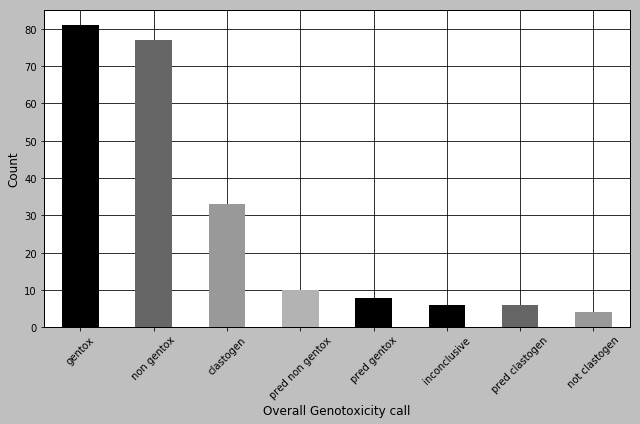

In [143]:
plt.style.use('grayscale')
plt.figure(figsize = (9,6))
calls_poc.Overall_genetox_call.value_counts().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig('POC_calls.png', dpi = 300)

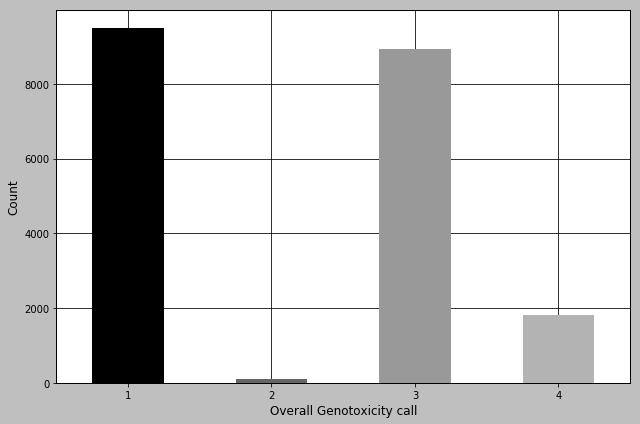

In [144]:
plt.style.use('grayscale')
plt.figure(figsize = (9,6))
calls_tsca.overall_genetox_score.value_counts().sort_index().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig('TSCA_scores.png', dpi = 300)

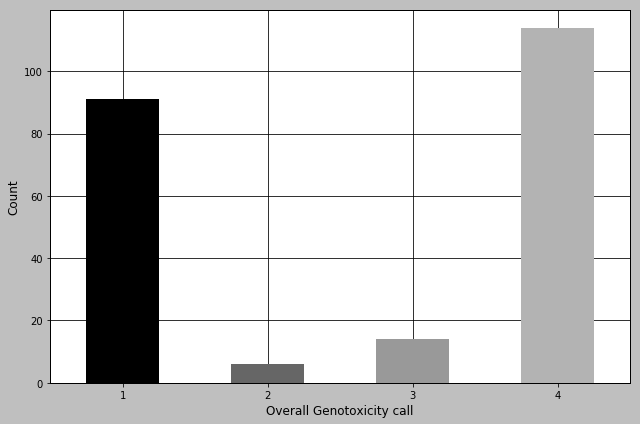

In [145]:
plt.style.use('grayscale')
plt.figure(figsize = (9,6))
calls_poc.overall_genetox_score.value_counts().sort_index().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig('POC_scores.png', dpi = 300)

In [146]:
expt_calls_df = calls_tsca[calls_tsca.Overall_genetox_call.isin(['non gentox',
       'gentox', 'clastogen','not clastogen', 'non gentox'])]

In [147]:
expt_calls_df.shape

(6194, 3)

In [148]:
expt_ids = expt_calls_df.dtxsid.tolist()

In [149]:
insilico_df = insilico.reset_index()

In [150]:
insilico_df.head()

,index,aggregate_study_type,assay_outcome,simple_aggregate
0,DTXSID2020004,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
1,DTXSID7020005,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
2,DTXSID2020006,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
3,DTXSID7020009,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
4,DTXSID6020010,DNA_Ames_CA_MNT_OASIS,0.0,pAmes


In [151]:
insilico_calls = {}
for i, group in insilico_df.groupby('index'):
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        insilico_calls[i]='gentox'
    elif ('clastogen', 1) in tuples:
        insilico_calls[i]='clastogen'  
    elif ('Ames', 2) in tuples:
        insilico_calls[i]='inconclusive'    
    elif ('clastogen', 2) in tuples:
        insilico_calls[i]='inconclusive' 
    elif ('Ames', 0) in tuples:
        insilico_insilico_calls[i]='non gentox'
    elif ('clastogen', 0) in tuples:
        insilico_calls[i]='not clastogen'    
    elif ('pAmes', 1) in tuples:
        insilico_calls[i]='pred gentox'
    elif ('pclastogen', 1) in tuples:
        insilico_calls[i]='pred clastogen'
    elif ('pAmes', 0) in tuples:
        insilico_calls[i]='pred non gentox'
    elif ('pclastogen', 0) in tuples:
        insilico_calls[i]='pred non clastogen'
    else:
        None

In [152]:
insilico_calls_df = pd.DataFrame(list(insilico_calls.items()), columns = ['dtxsid', 'overall_call'])

In [153]:
insilico_calls_df.head()

,dtxsid,overall_call
0,DTXSID001000726,pred clastogen
1,DTXSID001003875,pred gentox
2,DTXSID001006300,pred gentox
3,DTXSID001007489,pred gentox
4,DTXSID001009104,pred clastogen


In [154]:
tag_pred = {'pred gentox': 4, 'pred non gentox': 1, 'pred clastogen' :4}

In [155]:
preds_df = insilico_calls_df[insilico_calls_df['dtxsid'].isin(expt_ids)]

In [156]:
#expt_calls_df

In [157]:
merged_df = pd.merge(preds_df, expt_calls_df, on = 'dtxsid')

In [158]:
merged_df['predicted_score'] = merged_df['overall_call'].map(tag_pred)

In [159]:
tag_pred2 ={4:1, 1:0}

In [160]:
merged_df = merged_df.replace(tag_pred2)

In [161]:
merged_df.overall_genetox_score.value_counts()

0    3636
1    1594
Name: overall_genetox_score, dtype: int64

In [162]:
from sklearn.metrics import recall_score
#from sklearn.metrics import balanced_accuracy
from sklearn.metrics import roc_auc_score

In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [166]:
print(roc_auc_score(merged_df['overall_genetox_score'], merged_df['predicted_score']))

0.5753202672839429


In [167]:
confusion_matrix(merged_df['overall_genetox_score'], merged_df['predicted_score'])

array([[1394, 2242],
       [ 371, 1223]])

In [171]:
tn, fp, fn, tp = pd.crosstab(merged_df['overall_genetox_score'], merged_df['predicted_score']).values.ravel()

In [173]:
sens = tp/(tp+fn)
print(sens)

0.7672521957340025


In [174]:
spec = tn/(tn+fp)
print(spec)

0.3833883388338834


In [175]:
print((sens + spec)/2)

0.5753202672839429
